# Data Visualization - FIFA Players

## Project requirements

1. Clean up your dataset
2. Describe your data with descriptive stats (mean, median, whatsoever...)
3. Get some useful aggregations
4. Calculate your own column if needed
5. Plot everything you want or you think is interesting/useful/pretty/informative/whatsoever...
- BTW : Don't forget to parse 1 column

## Data cleaning

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [290]:
df=pd.read_csv('data.csv')

### Column selection

In [291]:
df=df.drop(['Unnamed: 0'],axis=1)

In [292]:
df=df.drop(['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'],axis=1)
         

In [293]:
df=df.drop(df.columns[28:],axis=1)

In [294]:
df=df.drop(['Body Type','Real Face','Joined','Loaned From','Contract Valid Until','Crossing','Position','Flag','Club Logo','Special','Weak Foot','Skill Moves','Work Rate'],axis=1)


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 15 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Jersey Number               18147 non-null float64
Height                      18159 non-null object
Weight                      18159 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 2.1+ MB


In [296]:
df.head()

,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Jersey Number,Height,Weight
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,10.0,5'7,159lbs
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,7.0,6'2,183lbs
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,10.0,5'9,150lbs
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,1.0,6'4,168lbs
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,7.0,5'11,154lbs


### Format

In [297]:
#df.set_index(['ID'],inplace = True)

In [298]:
df

,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Jersey Number,Height,Weight
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,10.0,5'7,159lbs
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,7.0,6'2,183lbs
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,10.0,5'9,150lbs
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,1.0,6'4,168lbs
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,7.0,5'11,154lbs
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,91,91,Chelsea,€93M,€340K,Right,4.0,10.0,5'8,163lbs
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,91,91,Real Madrid,€67M,€420K,Right,4.0,10.0,5'8,146lbs
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,5.0,9.0,6'0,190lbs
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,91,91,Real Madrid,€51M,€380K,Right,4.0,15.0,6'0,181lbs
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,90,93,Atlético Madrid,€68M,€94K,Right,3.0,1.0,6'2,192lbs


In [299]:
df.Value.unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [336]:
import re
df['Value'].replace(regex=True,to_replace=r'(€)',value=r'',inplace=True)

In [337]:
#df['Value'].apply(lambda x: x.replace('€','').replace(',','.')).astype(float)

In [338]:
df['Value'].replace(regex=True,to_replace=r'[.]',value=r'',inplace=True)

In [339]:
df['Value'].replace(regex=True,to_replace=r'[M]',value=r'000000',inplace=True)

In [340]:
df['Value'].replace(regex=True,to_replace=r'[K]',value=r'000',inplace=True)

In [341]:
df.Value.dtypes

dtype('O')

In [342]:
df['Value']=df['Value'].astype(int)

In [343]:
df.Value.dtypes

dtype('int64')

In [306]:
df['Wage'].replace(regex=True,to_replace=r'(€)',value=r'',inplace=True)

In [307]:
df['Wage'].replace(regex=True,to_replace=r'[K]',value=r'000',inplace=True)

In [308]:
df['Wage']=df['Wage'].astype(int)

In [309]:
df.head()


,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Jersey Number,Height,Weight
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,94,94,FC Barcelona,1105000000,565000,Left,5.0,10.0,5'7,159lbs
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,94,94,Juventus,77000000,405000,Right,5.0,7.0,6'2,183lbs
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,92,93,Paris Saint-Germain,1185000000,290000,Right,5.0,10.0,5'9,150lbs
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,91,93,Manchester United,72000000,260000,Right,4.0,1.0,6'4,168lbs
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,91,92,Manchester City,102000000,355000,Right,4.0,7.0,5'11,154lbs


In [310]:
df[['Weight'][0]].dtypes

dtype('O')

In [311]:
df.Weight.unique()

array(['159lbs', '183lbs', '150lbs', '168lbs', '154lbs', '163lbs',
       '146lbs', '190lbs', '181lbs', '192lbs', '176lbs', '172lbs',
       '148lbs', '165lbs', '196lbs', '161lbs', '187lbs', '212lbs',
       '170lbs', '203lbs', '157lbs', '185lbs', '130lbs', '174lbs',
       '207lbs', '134lbs', '141lbs', '152lbs', '179lbs', '132lbs',
       '201lbs', '198lbs', '209lbs', '214lbs', '143lbs', '205lbs',
       '137lbs', '194lbs', '216lbs', '139lbs', '220lbs', '126lbs',
       '218lbs', '123lbs', '227lbs', '128lbs', '223lbs', '225lbs',
       '121lbs', '115lbs', '117lbs', '236lbs', '229lbs', '243lbs', nan,
       '110lbs', '119lbs', '234lbs'], dtype=object)

In [312]:
df['Weight'].replace(regex=True,to_replace=r'[lbs]',value=r'',inplace=True)
#df['Weight'].apply(lambda x: x.replace('lbs',''))

In [313]:
df['Weight']=df['Weight'].astype('float64')

In [314]:
df['Weight']=df['Weight'].apply(lambda x: round(x/2.205,0))

In [315]:
df['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [316]:

df['Height']=df['Height'].replace(regex=True,to_replace=r"[']",value=r".").astype('float64')
#df['Height'].apply(lambda x: x.replace("'","."))
#

In [317]:
df['Height']=df['Height'].apply(lambda x: round((x*30.48),1))

In [318]:
df.shape

(18207, 15)

In [344]:
df.shape

(17918, 15)

### Missing values

In [345]:
df['Club']=df['Club'].fillna(0)

In [346]:
#df(df['Club']==0)
df=df[df.Club !=0]

In [347]:
df['Height']=df['Height'].fillna(0)
df=df[df.Height !=0]

In [348]:
df['Weight']=df['Weight'].fillna(0)
df=df[df.Weight!=0]

In [349]:
df.isna().sum()

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

In [350]:
df['Jersey Number']=df['Jersey Number'].astype(str)

In [600]:
df['Jersey Number'].value_counts()

8.0     602
7.0     594
10.0    588
11.0    583
6.0     576
5.0     570
9.0     566
20.0    560
1.0     558
4.0     558
17.0    544
18.0    536
3.0     536
23.0    536
19.0    535
14.0    532
21.0    524
22.0    521
2.0     509
16.0    507
15.0    490
24.0    425
27.0    423
25.0    409
13.0    407
26.0    390
12.0    379
30.0    371
29.0    358
28.0    357
       ... 
53.0     11
52.0     10
60.0     10
71.0     10
92.0     10
57.0      8
61.0      7
51.0      7
72.0      7
75.0      6
69.0      6
83.0      6
73.0      6
62.0      6
82.0      5
81.0      5
59.0      5
67.0      5
58.0      5
78.0      5
63.0      4
86.0      4
65.0      4
68.0      4
84.0      4
76.0      4
74.0      2
64.0      2
79.0      2
85.0      1
Name: Jersey Number, Length: 99, dtype: int64

## Descriptive statistics

In [352]:
df.head()

,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Jersey Number,Height,Weight
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,94,94,FC Barcelona,1105000000,565000,Left,5.0,10.0,173.7,72.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,94,94,Juventus,77000000,405000,Right,5.0,7.0,189.0,83.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,92,93,Paris Saint-Germain,1185000000,290000,Right,5.0,10.0,179.8,68.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,91,93,Manchester United,72000000,260000,Right,4.0,1.0,195.1,76.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,91,92,Manchester City,102000000,355000,Right,4.0,7.0,155.8,70.0


In [353]:
df.shape

(17918, 15)

In [354]:
df.to_csv('/Users/archanavillalba/Data/everyday_code/Module1_project/main_data.csv', index=False)

In [355]:
df.shape

(17918, 15)

Profile of a FIFA Player:
- Age: 25
- Height: 177cm
- Weight: 75Kg
- Nationality : England
- Average Wage: 9884
- Average Value: 13848712 euros
- Jersey number : 8
- Right Foot

In [356]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Height,Weight
count,17918.000000,17918.000000,17918.000000,17918.000000,1.791800e+04,17918.000000,17918.000000,17918.000000,17918.000000
mean,214225.713472,25.105257,66.236801,71.329334,1.384871e+07,9883.748186,1.113908,176.688810,75.284239
std,30042.543245,4.675372,6.929243,6.144098,4.015861e+07,22142.768987,0.395495,13.671732,7.080610
min,16.000000,16.000000,46.000000,48.000000,0.000000e+00,1000.000000,1.000000,155.400000,50.000000
25%,200235.250000,21.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,155.800000,70.000000
50%,221701.500000,25.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,179.800000,75.000000
75%,236508.750000,28.000000,71.000000,75.000000,1.300000e+07,9000.000000,1.000000,185.900000,80.000000
max,246620.000000,45.000000,94.000000,95.000000,1.185000e+09,565000.000000,5.000000,210.300000,110.000000


In [357]:
import matplotlib
%matplotlib inline

In [358]:
df.Value.mean()

13848712.467909364

In [359]:
df['Preferred Foot'].value_counts()

Right    13756
Left      4162
Name: Preferred Foot, dtype: int64

In [360]:
df.Nationality.value_counts()

England                 1657
Germany                 1195
Spain                   1071
Argentina                935
France                   911
Brazil                   825
Italy                    699
Colombia                 616
Japan                    478
Netherlands              452
Sweden                   394
China PR                 390
Chile                    388
Republic of Ireland      368
Mexico                   365
United States            353
Poland                   347
Norway                   341
Saudi Arabia             337
Denmark                  335
Korea Republic           333
Portugal                 321
Turkey                   303
Austria                  296
Scotland                 283
Belgium                  259
Australia                234
Switzerland              220
Uruguay                  146
Senegal                  130
                        ... 
Eritrea                    2
Uzbekistan                 2
Dominican Republic         2
Hong Kong     

In [535]:
club_pvtab=df.pivot_table(index='Club',values='Wage').sort_values(by='Wage', ascending=False)
club_pvtab=club_pvtab.reset_index()

In [536]:
club_pvtab=club_pvtab.iloc[:10]
club_pvtab

,Club,Wage
0,Real Madrid,152030.303030
1,FC Barcelona,146575.757576
2,Juventus,131680.000000
3,Manchester City,113363.636364
4,Manchester United,102757.575758
5,Chelsea,98454.545455
6,Liverpool,87939.393939
7,Tottenham Hotspur,79484.848485
8,FC Bayern München,78827.586207
9,Arsenal,78424.242424


In [532]:
?pivot_table()

Object `pivot_table()` not found.


## Data Visualization

In [537]:
import seaborn as sns

### Clubs with highest wages

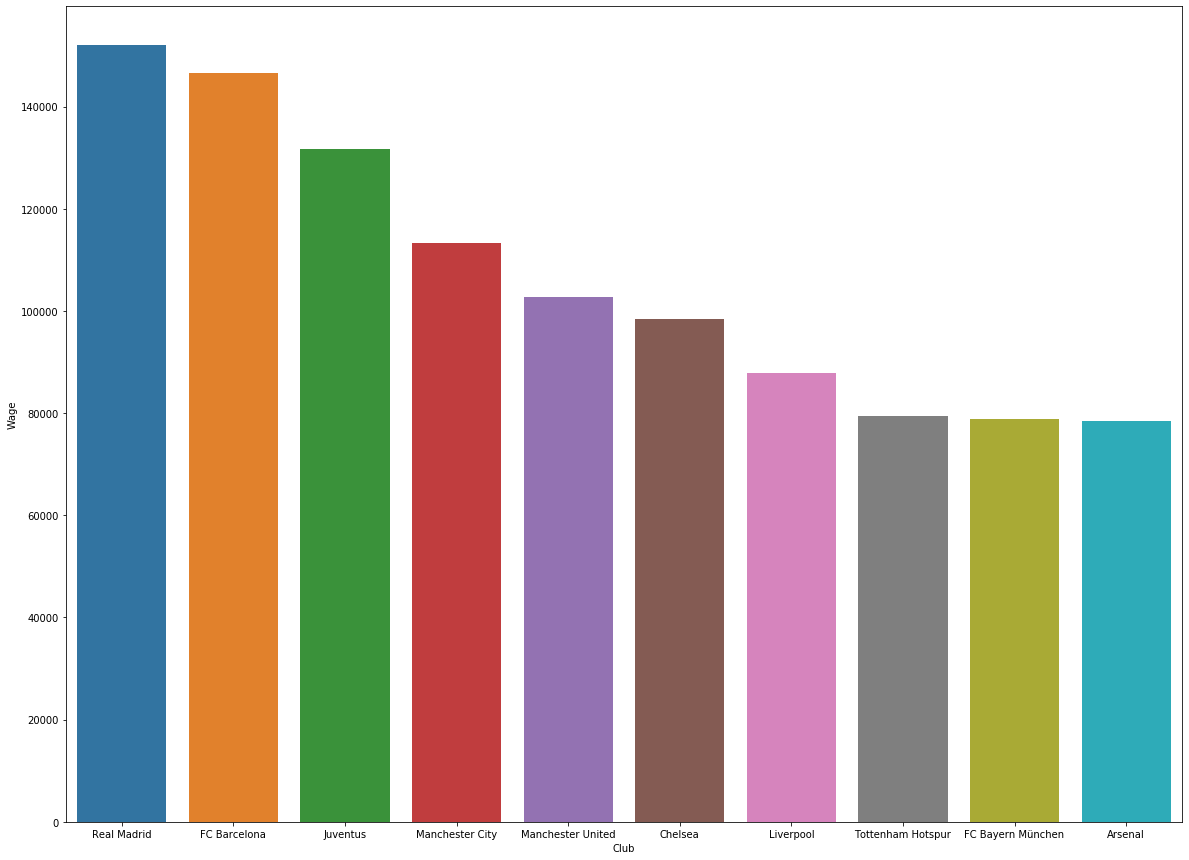

In [544]:
plt.figure(figsize=(20, 15))
sns.barplot(x="Club", y="Wage", data=club_pvtab)

### Correlation Matrix

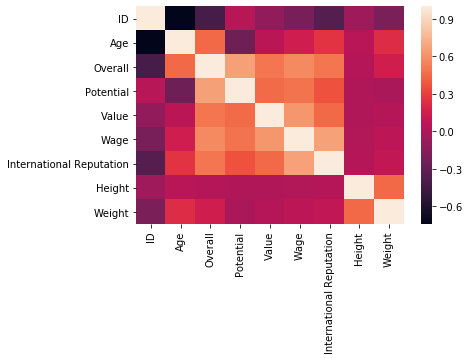

In [430]:
sns.heatmap(df.corr())

Wage correlated to Overall score, Value and international reputation

In [366]:
df['Wage'].corr(df['Overall'])

0.575939978920167

In [367]:
df['Wage'].corr(df['Value'])

0.6227655423823322

In [368]:
df['Wage'].corr(df['International Reputation'])

0.6707361624166772

### Wage Distribution

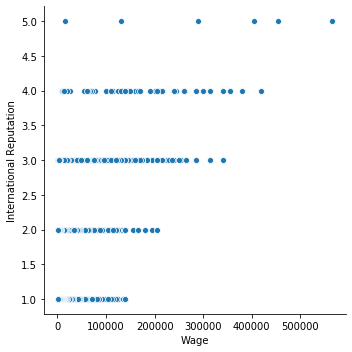

In [406]:
sns.relplot(data=df, x='Wage', y='International Reputation')

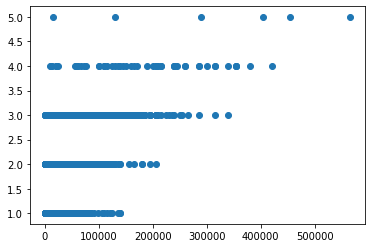

In [369]:
plt.scatter(x=df['Wage'],y=df['International Reputation'])


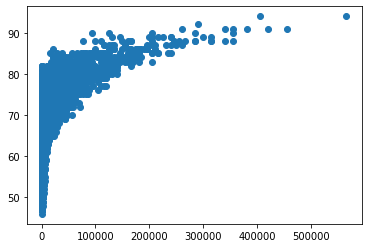

In [428]:
plt.plot( 'Wage', 'Overall', data=df, linestyle='none', marker='o')
plt.show()

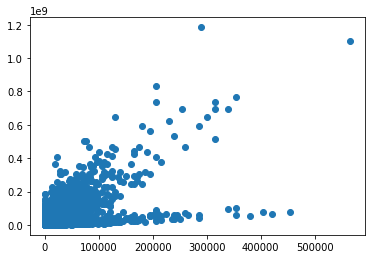

In [429]:
plt.plot( 'Wage', 'Value', data=df, linestyle='none', marker='o')
plt.show()

### Cumulative wage distribution

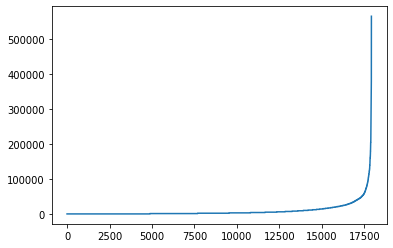

In [433]:
plt.plot(sorted(df['Wage']))
plt.show()

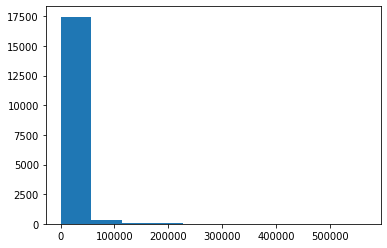

In [434]:
plt.hist(df['Wage'])
plt.show()

### Players

In [485]:
top_players=df.pivot_table(index=['Name','Nationality'],values=['Wage','Value','International Reputation','Potential','Overall']).sort_values(by=['Wage','International Reputation'], ascending=False)

In [486]:
top_players=top_players.reset_index()

In [488]:
top_players=top_players.iloc[:15]
top_players.head()

,Name,Nationality,International Reputation,Overall,Potential,Value,Wage
0,L. Messi,Argentina,5.0,94.0,94.0,1.105000e+09,565000.0
1,L. Suárez,Uruguay,5.0,91.0,91.0,8.000000e+07,455000.0
2,L. Modrić,Croatia,4.0,91.0,91.0,6.700000e+07,420000.0
3,Cristiano Ronaldo,Portugal,5.0,94.0,94.0,7.700000e+07,405000.0
4,Sergio Ramos,Spain,4.0,91.0,91.0,5.100000e+07,380000.0


In [ ]:
#top_players['Wage1']=(top_players.Wage-top_players.Wage.mean())/top_players.Wage.std()
#top_players['Value1']=(top_players.Value-top_players.Value.mean())/top_players.Value.std()

In [489]:
top_players

,Name,Nationality,International Reputation,Overall,Potential,Value,Wage
0,L. Messi,Argentina,5.0,94.0,94.0,1.105000e+09,565000.0
1,L. Suárez,Uruguay,5.0,91.0,91.0,8.000000e+07,455000.0
2,L. Modrić,Croatia,4.0,91.0,91.0,6.700000e+07,420000.0
3,Cristiano Ronaldo,Portugal,5.0,94.0,94.0,7.700000e+07,405000.0
4,Sergio Ramos,Spain,4.0,91.0,91.0,5.100000e+07,380000.0
5,G. Bale,Wales,4.0,88.0,88.0,6.000000e+07,355000.0
6,K. De Bruyne,Belgium,4.0,91.0,92.0,1.020000e+08,355000.0
7,T. Kroos,Germany,4.0,90.0,90.0,7.650000e+08,355000.0
8,E. Hazard,Belgium,4.0,91.0,91.0,9.300000e+07,340000.0
9,Coutinho,Brazil,3.0,88.0,89.0,6.950000e+08,340000.0


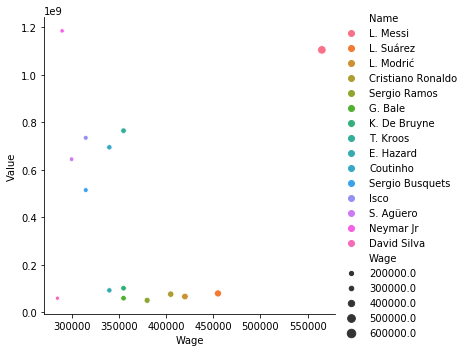

In [593]:

sns.relplot(data=top_players, x='Wage', y='Value', hue='Name', size='Wage')

In [495]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<BarContainer object of 15 artists>

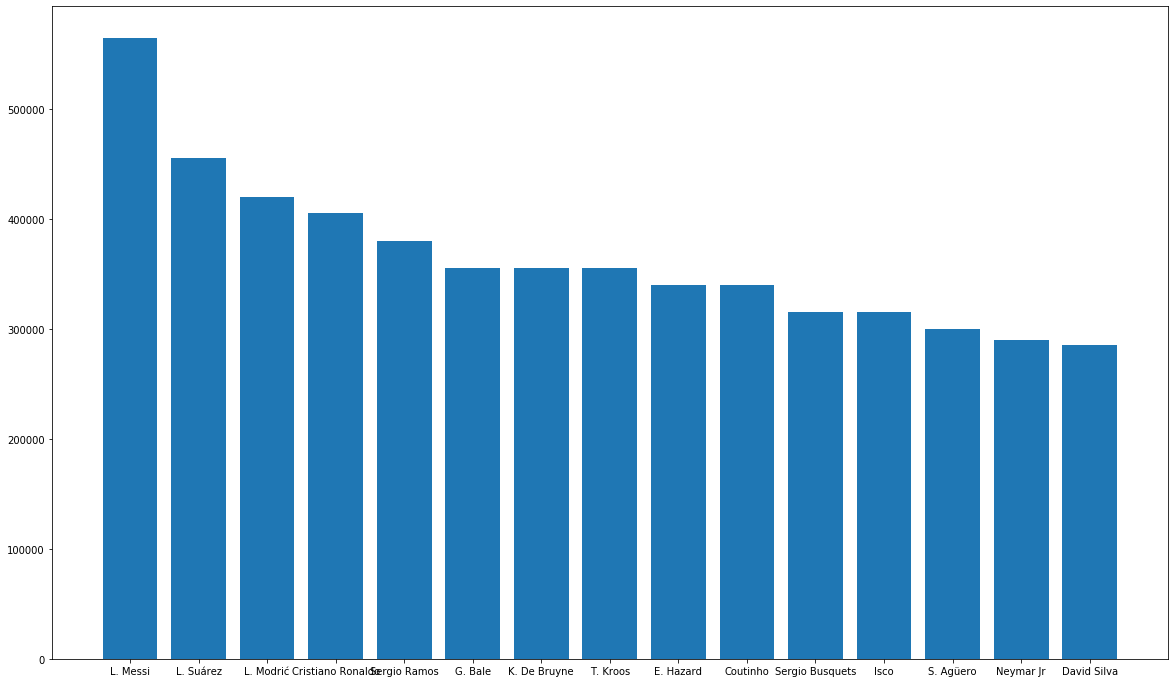

In [561]:
plt.figure(figsize=(20,12))
plt.bar(top_players['Name'],top_players['Wage'])

In [585]:
df_players=df.pivot_table(index=['Overall'],values=['Wage','Value','International Reputation','Name','Potential'],aggfunc={'Wage':np.mean,'Value':np.mean,'International Reputation':np.mean,'Name':len,'Potential':np.mean}).rename(columns={'Name':'Number of players'}).sort_values(by=['Number of players'], ascending=False)
#df_players=df_players.reset_index()

,International Reputation,Number of players,Potential,Value,Wage
Overall,,,,,
66,1.004348,1150,69.999130,1.622848e+06,3493.043478
67,1.012716,1101,70.603088,2.806839e+06,4409.627611
64,1.001854,1079,69.025950,5.279147e+05,2492.122335
65,1.010669,1031,69.282250,1.053298e+06,3047.526673
68,1.023645,1015,71.173399,4.770980e+06,5445.320197


In [586]:
df_players=df_players.reset_index()

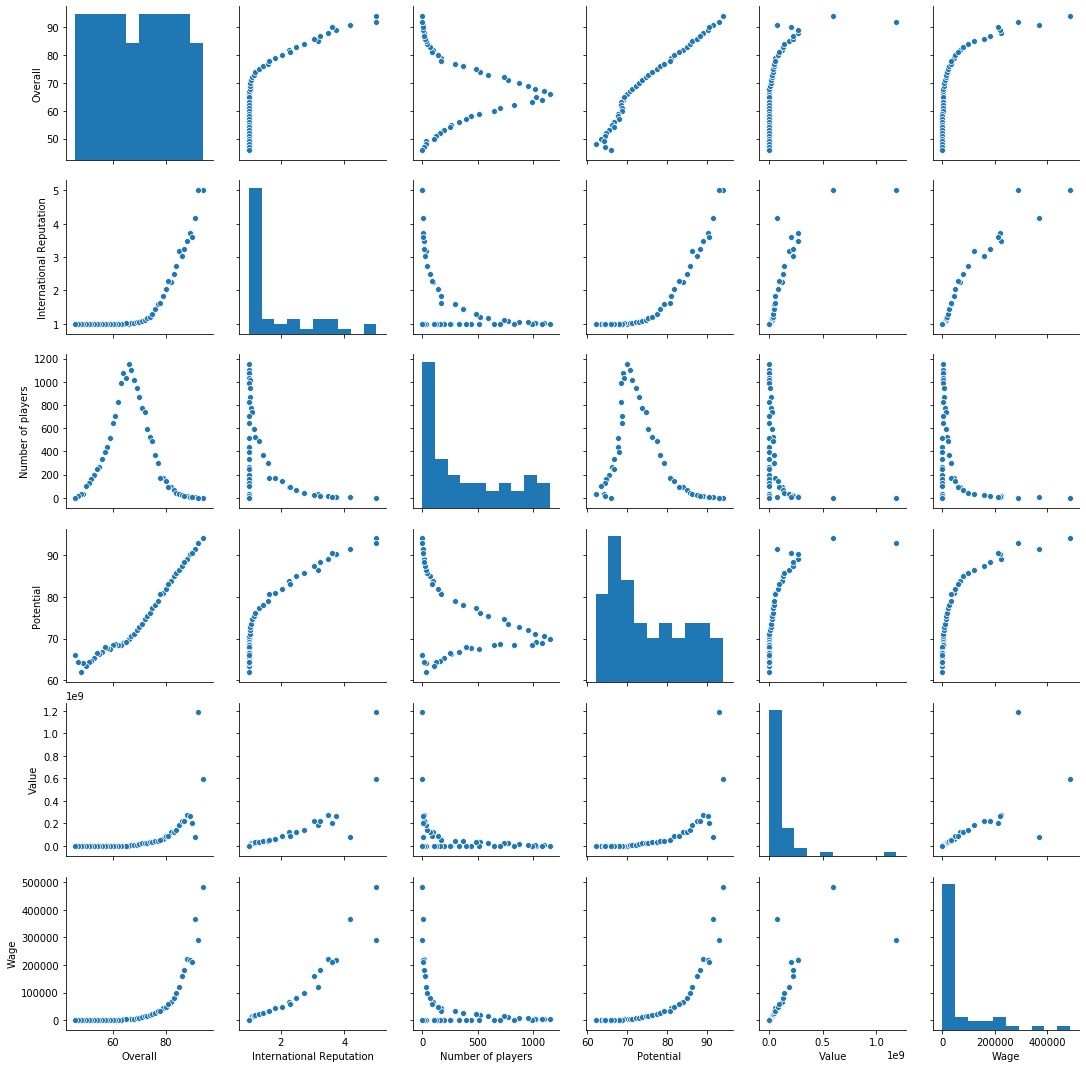

In [588]:
sns.pairplot(df_players)

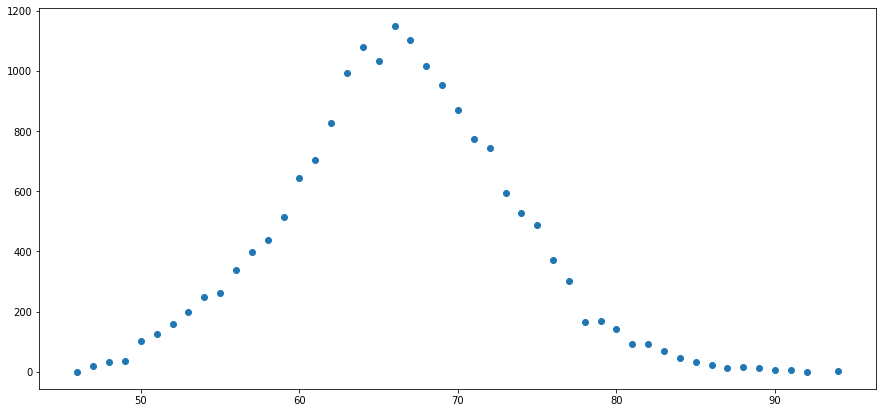

In [591]:
plt.figure(figsize=(15,7))
plt.plot( 'Overall', 'Number of players', data=df_players, linestyle='none', marker='o')
plt.show()


### Nationality

In [577]:
country=df.pivot_table(index=['Nationality'],values=['Wage','Value','International Reputation','Name'],aggfunc={'Wage':np.mean,'Value':np.mean,'International Reputation':np.mean,'Name':len}).rename(columns={'Name':'Number of players'}).sort_values(by=['Number of players'], ascending=False)


,International Reputation,Number of players,Overall,Value,Wage
Overall,,,,,
66,1.004348,1150,66,1.622848e+06,3493.043478
67,1.012716,1101,67,2.806839e+06,4409.627611
64,1.001854,1079,64,5.279147e+05,2492.122335
65,1.010669,1031,65,1.053298e+06,3047.526673
68,1.023645,1015,68,4.770980e+06,5445.320197


In [473]:
country=country.reset_index()

In [474]:
country=country.iloc[:30]

In [421]:
#country['Nationality_count']=country['Nationality'].astype('category').cat.codes

In [ ]:
country['Wage_cat']=country['Wage'].astype('category').cat.codes

In [ ]:
country.head()

In [ ]:
sns.relplot(data=country, x='Wage', y='Number of players', size='Wage')

In [558]:
df3 = country[country['Number of players'] > 450]

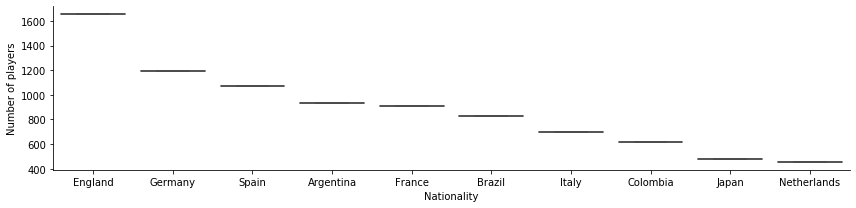

In [565]:
sns.catplot(data=df3,x='Nationality',y='Number of players',kind='box',height=3,aspect=4,color='blue')



<Figure size 1440x720 with 0 Axes>

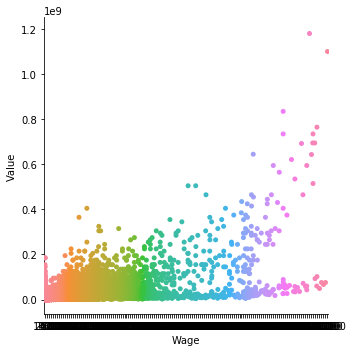

In [568]:
plt.figure(figsize=(20,10))
sns.catplot(x='Wage', y='Value', data=df)

In [475]:
country.head()

,Nationality,International Reputation,Number of players,Value,Wage
0,England,1.065178,1657,8.852655e+06,9965.600483
1,Germany,1.138912,1195,1.316896e+07,9660.251046
2,Spain,1.180205,1071,2.357761e+07,16337.068161
3,Argentina,1.132620,935,1.893851e+07,11525.133690
4,France,1.206367,911,1.770316e+07,14094.401756


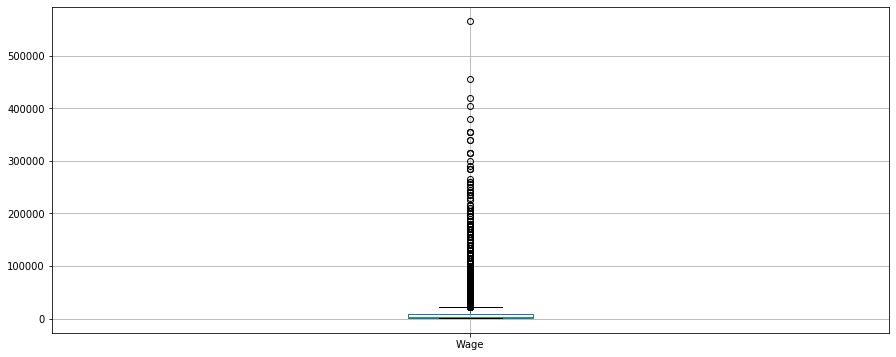

In [595]:
plt.figure(figsize=(15,6))
df.boxplot(column="Wage")

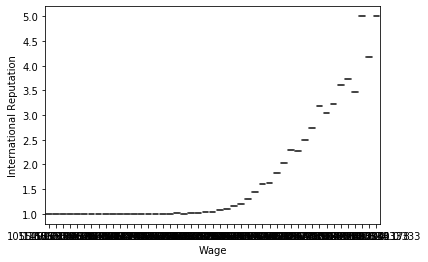

In [597]:
sns.boxplot(x='Wage', y='International Reputation', data=df_players)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 15 columns):
ID                          17918 non-null int64
Name                        17918 non-null object
Age                         17918 non-null int64
Photo                       17918 non-null object
Nationality                 17918 non-null object
Overall                     17918 non-null int64
Potential                   17918 non-null int64
Club                        17918 non-null object
Value                       17918 non-null int64
Wage                        17918 non-null int64
Preferred Foot              17918 non-null object
International Reputation    17918 non-null float64
Jersey Number               17918 non-null object
Height                      17918 non-null float64
Weight                      17918 non-null float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


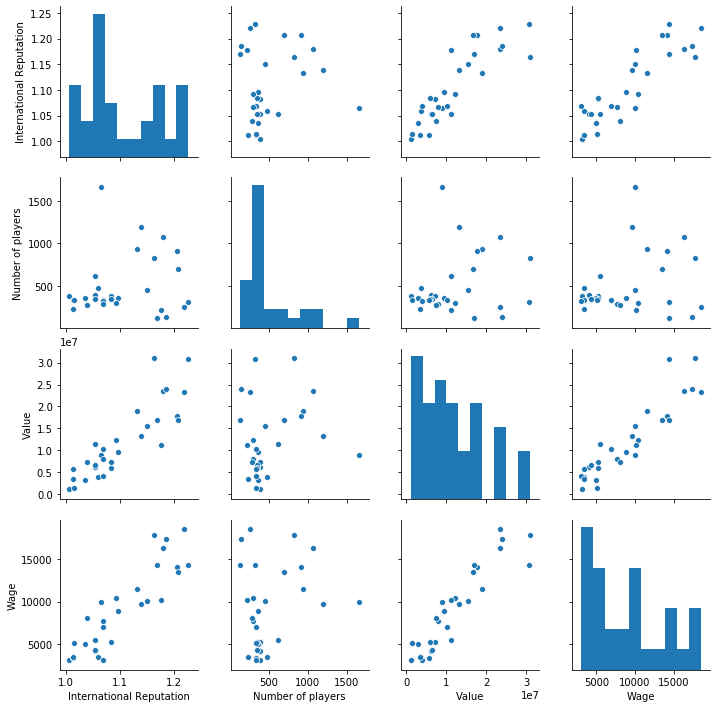

In [569]:
sns.pairplot(country)

### Clubs

In [599]:
df.pivot_table(index=['Club'],values=['Wage','Value','International Reputation','Name'],aggfunc={'Wage':np.mean,'Value':np.mean,'International Reputation':np.mean,'Name':len}).rename(columns={'Name':'Number of players'}).sort_values(by=['Wage'], ascending=False)


,International Reputation,Number of players,Value,Wage
Club,,,,
Real Madrid,2.090909,33,1.410432e+08,152030.303030
FC Barcelona,2.242424,33,1.460545e+08,146575.757576
Juventus,2.520000,25,1.289430e+08,131680.000000
Manchester City,2.090909,33,1.257532e+08,113363.636364
Manchester United,2.090909,33,9.791667e+07,102757.575758
Chelsea,2.121212,33,7.451561e+07,98454.545455
Liverpool,1.969697,33,9.051985e+07,87939.393939
Tottenham Hotspur,2.000000,33,1.067500e+08,79484.848485
FC Bayern München,2.517241,29,1.034216e+08,78827.586207


In [ ]:
my_pal_sex = {'male':'blue', 'female':'pink'}
sns.countplot(df.sex, palette = my_pal_sex)